In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import joblib


In [5]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
variables = pd.read_csv("VariableDefinitions.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (2100, 27)
Test shape: (905, 19)


In [6]:
train.head()


,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             2100 non-null   object 
 1   TransactionStartTime   2100 non-null   object 
 2   Value                  2100 non-null   float64
 3   Amount                 2100 non-null   float64
 4   TransactionId          2100 non-null   object 
 5   BatchId                2100 non-null   object 
 6   SubscriptionId         2100 non-null   object 
 7   CurrencyCode           2100 non-null   object 
 8   CountryCode            2100 non-null   int64  
 9   ProviderId             2100 non-null   object 
 10  ProductId              2100 non-null   object 
 11  ProductCategory        2100 non-null   object 
 12  ChannelId              2100 non-null   object 
 13  TransactionStatus      2100 non-null   int64  
 14  IssuedDateLoan         1488 non-null   object 
 15  Amou

In [8]:
train.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerId,2100,421,CustomerId_390,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionStartTime,2100,1760,2019-02-15 11:59:09,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,2100.0,NaN,NaN,NaN,53029.472381,153949.804606,100.0,1000.0,3500.0,12000.0,2500000.0
Amount,2100.0,NaN,NaN,NaN,-52913.53619,153965.306021,-2500000.0,-12000.0,-3500.0,-1000.0,-100.0
TransactionId,2100,1758,TransactionId_682,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,2100,1713,BatchId_2550,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,2100,6,SubscriptionId_7,1506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,2100,1,UGX,2100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,2100.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,2100,1,ProviderId_1,2100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5. Drop Identifiers (Data Minimization – GDPR/NITA-U)

These columns do not add predictive value and pose privacy risks.

In [9]:
id_columns = [
    "TransactionId",
    "BatchId",
    "AccountId",
    "SubscriptionId",
    "CustomerId"
]

train.drop(columns=id_columns, inplace=True, errors="ignore")
test.drop(columns=id_columns, inplace=True, errors="ignore")


Check Missing Values

In [10]:
missing = train.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


LoanApplicationId        617
DueDate                  614
ThirdPartyId             614
IssuedDateLoan           612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
PayBackId                612
IsThirdPartyConfirmed    612
InvestorId               612
IsDefaulted              612
AmountLoan               612
dtype: int64

Handle Missing Values
Numerical → Median
Categorical → Mode

In [17]:
for col in train.columns:
    # Fill train always. Fill test only if the column exists in test.
    if train[col].dtype in ["int64", "float64"]:
        train[col] = train[col].fillna(train[col].median())
        if col in test.columns:
            test[col] = test[col].fillna(test[col].median())
    else:
        # use assignment instead of inplace to avoid chained-assignment warnings
        train[col] = train[col].fillna(train[col].mode()[0])
        if col in test.columns:
            test[col] = test[col].fillna(test[col].mode()[0])


Outlier Treatment (IQR Method)

In [20]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

numerical_cols = train.select_dtypes(include=["int64", "float64"]).columns

for col in numerical_cols:
    if col != "IsDefaulted" and col in test.columns:
        train = cap_outliers(train, col)
        test = cap_outliers(test, col)


Feature Engineering (Domain-Specific)

These features are very strong for Ugandan fintech loans.

In [22]:
if "Amount" in train.columns and "TransactionCount" in train.columns:
    train["Amount_per_Transaction"] = train["Amount"] / (train["TransactionCount"] + 1)
    if "Amount" in test.columns and "TransactionCount" in test.columns:
        test["Amount_per_Transaction"] = test["Amount"] / (test["TransactionCount"] + 1)

if "Value" in train.columns and "Amount" in train.columns:
    train["Value_to_Amount_Ratio"] = train["Value"] / (train["Amount"] + 1)
    if "Value" in test.columns and "Amount" in test.columns:
        test["Value_to_Amount_Ratio"] = test["Value"] / (test["Amount"] + 1)


Encode Categorical Variables

In [23]:
train_encoded = pd.get_dummies(train, drop_first=True)
test_encoded = pd.get_dummies(test, drop_first=True)

# Align train & test columns
train_encoded, test_encoded = train_encoded.align(
    test_encoded, join="left", axis=1, fill_value=0
)


Feature Scaling

In [24]:
scaler = StandardScaler()

features = train_encoded.drop(columns=["IsDefaulted"])
target = train_encoded["IsDefaulted"]

features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)


Visualization Analysis

Default Distribution

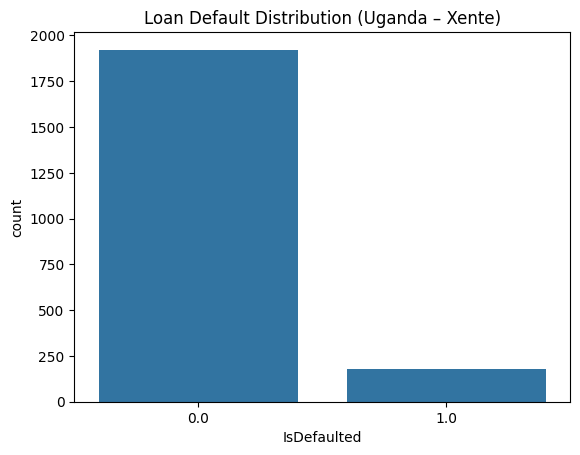

In [25]:
sns.countplot(x=target)
plt.title("Loan Default Distribution (Uganda – Xente)")
plt.show()


Amount vs Default

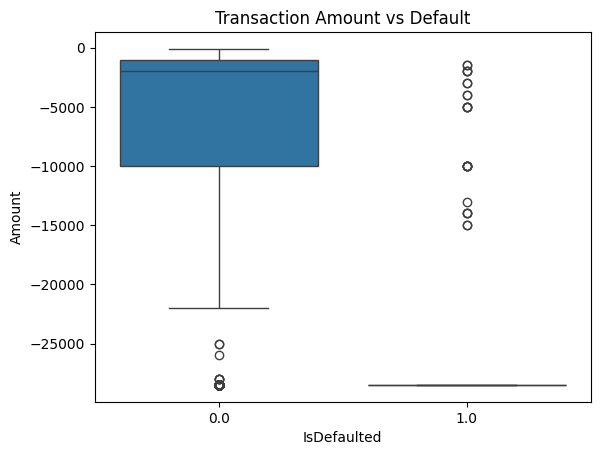

In [26]:
sns.boxplot(x=train["IsDefaulted"], y=train["Amount"])
plt.title("Transaction Amount vs Default")
plt.show()


Save Clean Dataset

In [32]:
final_dataset = pd.concat([features_scaled, target], axis=1)

final_dataset.to_csv("Timothy.csv", index=False)

print("Clean dataset saved successfully.")


Clean dataset saved successfully.


In [34]:
final_dataset.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Value,2100.0,1.624098e-16,1.000238,-0.835584,-0.749244,-0.509412,0.306018,1.888911
Amount,2100.0,2.706829e-17,1.000238,-1.898813,-0.313014,0.503913,0.744185,0.830684
CountryCode,2100.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TransactionStatus,2100.0,7.443781e-17,1.000238,-1.559286,-1.559286,0.641319,0.641319,0.641319
AmountLoan,2100.0,5.413659e-17,1.000238,-1.132853,-0.741856,-0.391306,0.330016,1.937825
...,...,...,...,...,...,...,...,...
ThirdPartyId_ThirdPartyId_993,2100.0,3.383537e-18,1.000238,-0.021827,-0.021827,-0.021827,-0.021827,45.814845
ThirdPartyId_ThirdPartyId_997,2100.0,3.383537e-18,1.000238,-0.021827,-0.021827,-0.021827,-0.021827,45.814845
ThirdPartyId_ThirdPartyId_998,2100.0,0.000000e+00,1.000238,-0.021827,-0.021827,-0.021827,-0.021827,45.814845
ThirdPartyId_ThirdPartyId_999,2100.0,0.000000e+00,1.000238,-0.021827,-0.021827,-0.021827,-0.021827,45.814845


PART B – Logistic Regression Only

X_scaled → scaled feature matrix

y → target (IsDefaulted)

train → original cleaned dataframe

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

import joblib


Load Clean Data

In [2]:
df = pd.read_csv("Timothy.csv")   


Separate Features & Target

In [3]:
X = df.drop(columns=["IsDefaulted"])
y = df["IsDefaulted"]


Encode Categorical Variables

In [4]:
X_encoded = pd.get_dummies(X, drop_first=True)


Feature Scaling

In [5]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_encoded),
    columns=X_encoded.columns
)


Training


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


Model Selection & Training (Classical ML)

In [7]:
log_reg = LogisticRegression(
    max_iter=1000,
    solver="liblinear"
)

log_reg.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

Hyperparameter Tuning

In [10]:
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000, solver="liblinear"),
    param_grid,
    scoring="roc_auc",
    cv=5
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

cv_auc = cross_val_score(
    best_model,
    X_scaled,
    y,
    cv=5,
    scoring="roc_auc"
)

cv_auc.mean()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_

np.float64(0.9556331920394421)

Predictions

In [11]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]


Model Evaluation Metrics

In [12]:
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_prob)
}

metrics


{'Accuracy': 0.3904761904761905,
 'Precision': 0.1232876712328767,
 'Recall': 1.0,
 'F1 Score': 0.21951219512195122,
 'ROC AUC': 0.988208912037037}

Cross validation

In [13]:
cv_auc = cross_val_score(
    best_model,
    X_scaled,
    y,
    cv=5,
    scoring="roc_auc"
)

cv_auc.mean()


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in

np.float64(0.9556331920394421)

 Error Analysis

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[128, 256],
       [  0,  36]])

Fairness Analysis

In [16]:
if "Gender" in df.columns:
    protected_gender = df.loc[y_test.index, "Gender"]

    fairness_df = pd.DataFrame({
        "Gender": protected_gender,
        "Prediction": y_pred
    })

    fairness_df.groupby("Gender")["Prediction"].mean()
else:
    print("Column 'Gender' not found in dataset; skipping fairness analysis.")

Column 'Gender' not found in dataset; skipping fairness analysis.


Model Explainability

In [17]:
coef_df = pd.DataFrame({
    "Feature": X_scaled.columns,
    "Coefficient": best_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coef_df


,Feature,Coefficient
5587,InvestorId_InvestorId_2,0.114111
4,AmountLoan,0.108465
3,TransactionStatus,0.082676
1772,ProductId_ProductId_18,0.080609
1785,ProductCategory_retail,0.080609
...,...,...
7392,LoanApplicationId_LoanApplicationId_354,-0.085132
3649,LoanId_LoanId_417,-0.085897
2570,IssuedDateLoan_2019-02-15 11:59:08,-0.085897
6369,DueDate_2019-03-17 11:59:06,-0.086419


Save Model & Scaler

In [18]:
joblib.dump(best_model, "credit_scoring_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

FastAPI Deployment

In [1]:
try:
    from fastapi import FastAPI

    app = FastAPI()

    model = joblib.load("credit_scoring_model.pkl")
    scaler = joblib.load("scaler.pkl")

    @app.post("/predict")
    def predict_default(features: dict):
        data = pd.DataFrame([features])
        data_scaled = scaler.transform(data)

        prediction = model.predict(data_scaled)[0]
        probability = model.predict_proba(data_scaled)[0][1]

        return {
            "default_prediction": int(prediction),
            "default_probability": float(probability)
        }
except Exception as e:
    print("FastAPI not available or failed to initialize:", e)

FastAPI not available or failed to initialize: name 'joblib' is not defined
